# 15.561 Assignment 3
In this assignment, you'll use your skills in `pandas` and SQL to manipulate data from the Northwind database and answer pressing business concerns. 

### Guidelines: 
* This is an _individual_ assignment. 
* Please ensure that the code for each question is placed in the appropriate cell, as noted by the comments in the cells. 
* When the assignment asks you to describe or comment on something, it's not a rhetorical question -- please do so in a new markdown cell! 
* All answers to quantitative questions must be output by your code -- reading a table and doing the calculation "on paper" is not considered correct for this exercise. For example, if the question asks for the sum of the elements in `[1,2,3]`, your answer should be `sum([1,2,3])`, even if you can tell the answer is 6 by looking at the array. 

# Imports, downloads, and reading data 
The code below imports `pandas` and `matplotlib.pyplot`, and downloads the Northwind Product Database from Assignment 1.

In [112]:
import pandas as pd 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [113]:
!wget  -O northwind_db.xlsx https://docs.google.com/spreadsheets/d/1mD4Hn4NZdJlXMC4EJcSp27vg-_jbxUYJ95vQvMbSpVM/export?format=xlsx&id=1mD4Hn4NZdJlXMC4EJcSp27vg-_jbxUYJ95vQvMbSpVM 

--2022-11-08 13:13:32--  https://docs.google.com/spreadsheets/d/1mD4Hn4NZdJlXMC4EJcSp27vg-_jbxUYJ95vQvMbSpVM/export?format=xlsx
Resolving docs.google.com (docs.google.com)... 173.194.212.100, 173.194.212.102, 173.194.212.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.212.100|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-08-0g-sheets.googleusercontent.com/export/3sm34aofsvmt5ehut1q6bddr3o/ljad0gb372il2hjgomuc3as2es/1667913210000/117251596164051843428/*/1mD4Hn4NZdJlXMC4EJcSp27vg-_jbxUYJ95vQvMbSpVM?format=xlsx [following]
--2022-11-08 13:13:32--  https://doc-08-0g-sheets.googleusercontent.com/export/3sm34aofsvmt5ehut1q6bddr3o/ljad0gb372il2hjgomuc3as2es/1667913210000/117251596164051843428/*/1mD4Hn4NZdJlXMC4EJcSp27vg-_jbxUYJ95vQvMbSpVM?format=xlsx
Resolving doc-08-0g-sheets.googleusercontent.com (doc-08-0g-sheets.googleusercontent.com)... 142.251.162.132, 2607:f8b0:400c:c38::84
Connecting to doc-08-0g-sheets.googleu

# Question 1: Understanding employee performance in timely shipping 
**Note:** This section is to be completed in `pandas`.

Some of Northwind's customers are complaining that shipments are arriving much later than they should, claiming that the "shipping date" was later than the "required date". To get to the bottom of this, use the data in the `Orders` tab and write code to answer the following: 
1. What percentage of all shipments are shipped after the required date (we'll call these late shipments)? 
  * **Hint:** You can use the `>` operator to compare dates. To get the percentage of true values, you can take the `.mean()` of a series of Booleans, because a `True` value is interpreted as `1`, and a `False` value is interpreted as `0`. 

2. For each employee, what percentage of the orders processed by the employee are late (i.e. the late shipment rate)? Report this in two ways: 

  1. Printing a dataframe showing the employee ID and percentage of late shipments 
    * **Hint:** You can use the `.groupby(COLUMN_NAME)` method on a dataframe to aggregate a computation by the values of a given column. For example, `df.groupby("EmployeeID")["Freight"].mean()` would give the average freight per employee ID. 

  2. A bar plot, showing the late shipment rate of each employee in descending order from left to right. Make sure to: 
    * Label the x- and y-axis 
    * Title your plot "Late shipment rate, by employee" 
    * **Hint:** The `.sort_values()` method of a dataframe will be useful here. To generate a bar plot, use the `.plot()` method of a dataframe with `kind="bar"`. We've imported `matplotlib.pyplot` for you as `plt`, so you can use `plt.ylabel()` and `plt.title()` to label your y-axis and plot. 

In [114]:
# Code to answer 1.1 goes here. The final line should print the percentage requested. 
# Running the code as provided will give the wrong answer! See the comments for suggestions on how to fix it. 

df_orders = pd.read_excel("northwind_db.xlsx", sheet_name="Orders")

df_orders['shipped_late'] = df_orders['ShippedDate'] > df_orders['RequiredDate'] #How can you fix this code to generate the correct answer? 
percent = (df_orders['shipped_late'].value_counts(normalize=True) * 100).to_frame('percent').reset_index()
percent[percent['index'] == True]['percent']

1    4.457831
Name: percent, dtype: float64

Text(0.5, 1.0, 'Late shipment rate, by employee')

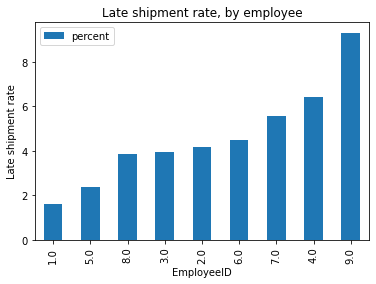

In [115]:
# Code to display the plot for 1.2.2 goes here.
employees = (df_orders.groupby("EmployeeID")["shipped_late"].value_counts(normalize=True) * 100).to_frame('percent').reset_index()
employees = employees[employees['shipped_late'] == True].sort_values(by=['percent'])
employees.plot(kind='bar', x='EmployeeID', y='percent')
plt.ylabel('Late shipment rate')
plt.xlabel('EmployeeID')
plt.title('Late shipment rate, by employee')

In [116]:
# Code to answer 1.2.1 goes here. The final line should display the dataframe requested. 
employees = (df_orders.groupby("EmployeeID")["shipped_late"].value_counts(normalize=True) * 100).to_frame('percent').reset_index()
employees = employees[employees['shipped_late'] == True].sort_values(by=['percent'])
employees

,EmployeeID,shipped_late,percent
1,1.0,True,1.626016
9,5.0,True,2.380952
15,8.0,True,3.846154
5,3.0,True,3.937008
3,2.0,True,4.166667
11,6.0,True,4.477612
13,7.0,True,5.555556
7,4.0,True,6.410256
17,9.0,True,9.302326


# Question 2: Logistics troubles 



1. Take a look at the `Orders` and `Orders Details` tabs of the Northwind spreadsheet. What does each sheet describe, and how are they related? (Answer in markdown cell below.)


For 2.2 and 2.3, we've already provided the answers. Play around with the code provided, and make an interesting change or extension to the code to answer your own business question. Describe your modifications and the insights you've generated in the given markdown cell. 


2. There's been a disruption in the logstics sector, and Northwind is no longer able to import products from the USA and Canada. Combining data in the `Product`, `Orders Details`, and `Suppliers` sheets, write code to answer the following: 
  1. How many suppliers are affected by this disruption? 

  2. How many products are made by the suppliers in these countries? 

  3. How many products are affected in each `CategoryID`? 

  4. If we define revenue as `UnitPrice * Quantity * (1-Discount)`, how much of Northwind's historical revenue has been from items affected by this disruption? 



3. Extending the answer to question 2.2.4 above: 
  1. Write code that prints the statement `The total historical revenue generated by products from {COUNTRY} is {sum of historical revenue}` for each country. 

  2. Generate a pie chart showing the contribution of each country's products to the total historical revenue of Northwind. 

### Answer question 2.1 in this Markdown cell

**The order sheet describe the basic order infomarion, including source and desctination regions, the sender, taker, receiver of order, the ship, required, shipped dates, and the order freight.  The order details sheet describe the product detail infomation of each order in order sheet, including product id, unit price, quantity and discount. The two sheet can be connected by order id**

### Modify and expand the following codes to the answers of 2.2 and 2.3 in this Markdown cell

In [117]:
# Code to answer question 2.2.1 goes here. The final line should print the number of suppliers affected by the disruption.
df_suppliers = pd.read_excel("northwind_db.xlsx", sheet_name="Suppliers")
df_order_details = pd.read_excel("northwind_db.xlsx", sheet_name="Orders Details")
df_products = pd.read_excel("northwind_db.xlsx", sheet_name="Product")
df_orders = pd.read_excel("northwind_db.xlsx", sheet_name="Orders")

affected_suppliers = df_suppliers[df_suppliers['Country'].isin(["USA", "Canada"])]
print(len(affected_suppliers))

6


In [118]:
# Code to answer question 2.2.2 goes here. The final line should print the number of products affected by the disruption.
print(len(df_products[df_products['SupplierID'].isin(affected_suppliers['SupplierID'])]))

16


In [119]:
# Code to answer question 2.2.3 goes here. The final line should print the number of affected products in each CategoryID.
df_products[df_products['SupplierID'].isin(affected_suppliers['SupplierID'])]['CategoryID'].value_counts().to_frame('Affected products num')

,Affected products num
2.0,7
1.0,3
8.0,2
6.0,2
7.0,1
3.0,1


In [120]:
df_order_details_country = (df_order_details
                         .merge(df_products, on="ProductID", how="left")
                         .merge(df_suppliers, on="SupplierID", how="left")
                         .merge(df_orders, on="OrderID", how="left"))

 
df_order_details_country['Year'] = pd.to_datetime(df_order_details_country['OrderDate'], format='%Y/%m/%d').dt.strftime('%Y')
df_order_details_country.groupby(['Country', 'Year']).size().unstack(fill_value=0)[:10]
# each supplier souce country has different trend of order number made focus on recent orders will obtain new insight

Year,1996,1997,1998
Country,,,
Australia,47,125,89
Brazil,11,19,21
Canada,26,73,42
Denmark,5,23,13
Finland,13,33,24
France,38,82,57
Germany,49,133,88
Italy,42,88,47
Japan,22,59,38


In [121]:
# Code to answer question 2.2.4 goes here. The final line should print the total historical revenue from products affected by the disruption.
affected_product_ids = df_products[df_products['SupplierID'].isin(affected_suppliers['SupplierID'])]['ProductID']

df_affected_order_items = df_order_details[df_order_details['ProductID'].isin(affected_product_ids)]

df_affected_order_items['revenue'] = df_affected_order_items['UnitPrice'] * df_affected_order_items['Quantity'] * (1-df_affected_order_items['Discount'])
df_order_details['revenue'] = df_order_details['UnitPrice'] * df_order_details['Quantity'] * (1-df_order_details['Discount'])

print(df_affected_order_items['revenue'].sum())

print(df_affected_order_items['revenue'].sum() / df_order_details['revenue'].sum() * 100)
# about 16% of revenue will be affected

205845.67226895335
16.26219026670404


In [122]:
# Code to answer question 2.3.1 goes here. This cell should print the statements described in the prompt. 
df_full_order_details = (df_order_details
                         .merge(df_products, on="ProductID", how="left")
                         .merge(df_suppliers, on="SupplierID", how="left")
                         .merge(df_orders, on="OrderID", how="left"))

df_full_order_details['revenue'] = df_full_order_details['UnitPrice'] * df_full_order_details['Quantity'] * (1-df_full_order_details['Discount'])
df_full_order_details.groupby("Country")['revenue'].sum().reset_index().sort_values("revenue", ascending=False)[:10]

,Country,revenue
5,France,277554.129741
6,Germany,197450.016387
0,Australia,172086.545319
15,USA,122103.464888
7,Italy,98479.774910
2,Canada,83742.207381
14,UK,78432.039925
8,Japan,45263.094938
10,Norway,43141.509957
11,Singapore,42017.644953


In [123]:
df_recent_order_details = df_full_order_details[df_full_order_details['OrderDate'] > '1998-01-01']
df_recent_order_details['revenue'] = df_recent_order_details['UnitPrice'] * df_recent_order_details['Quantity'] * (1-df_recent_order_details['Discount'])
df_recent_order_details.groupby("Country")['revenue'].sum().reset_index().sort_values("revenue", ascending=False)[:10]
# there are small difference between the revenue of affected recent order and affected full order, 
# but the recent situation is better to indicate the future state

,Country,revenue
5,France,117652.369958
6,Germany,72887.115470
0,Australia,48447.212965
15,USA,44950.227468
14,UK,31031.029969
2,Canada,27573.372445
7,Italy,24580.074989
8,Japan,13747.802469
10,Norway,11980.899992
11,Singapore,11450.279974


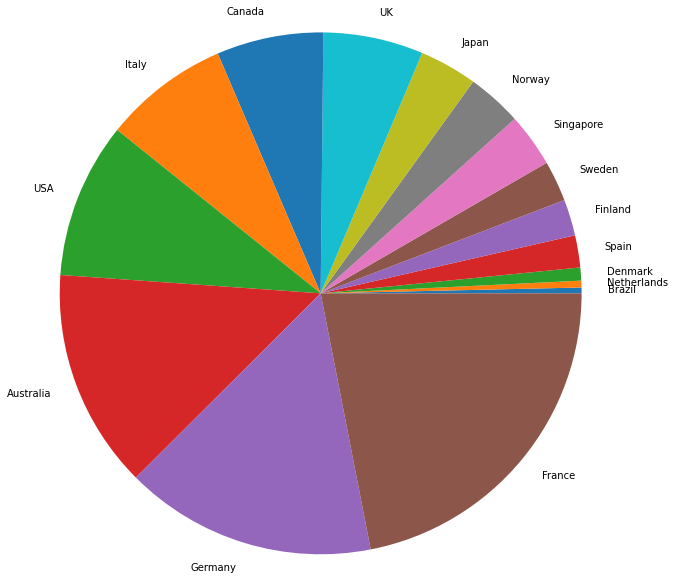

In [124]:
# Code to answer question 2.3.2 goes here. This cell should generate a pie chart of the proportion of historical revenue generated by each country's products. 
df_country_revenues = df_full_order_details.groupby("Country")['revenue'].sum().sort_values()

df_country_revenues.plot(y="revenue", kind="pie", radius=3, legend=False, ylabel="")

# Question 3: Freigh-cation
**Note:** This section is to be completed in SQL (unless explicitly told otherwise). Run the first cell in this section to set up your SQL database and define a function called `display_query` which will make it easier for you to run your SQL queries. To show the result of a query, provide it as a string to the `display_query` function.

1. Freight costs are hitting Northwind hard, and you've been tasked with finding the customers with the largest freight weights. Using the `Orders` table:
  1. Write a query that returns a table with `CustomerID` and a column called `AvgFreight` that shows the average freight weight of the customer's orders, sorted by `AvgFreight` in ***descending*** order. 
    * **Hint:** `SELECT AVG(COLUMN_NAME) FROM TABLE_NAME` will return the average of the column you've specified. You can add `GROUP BY` at the end to aggregate by `CustomerID` [[documentation]](https://www.sqlitetutorial.net/sqlite-group-by/) and `ORDER BY` to sort the results [[documentation]](https://www.sqlitetutorial.net/sqlite-order-by/). 
  2. Let a "heavy order" be defined as one for which the freight weight exceeds 100. Write a query that returns a table with `CustomerID` and a column called `NumHeavyOrders` which contains the number of heavy orders made by the customer. **The result should be sorted by NumHeavyOrders in *ascending* order, and only include customers with more than 3 heavy orders.**
    * **Hint:** `SELECT SUM(LOGICAL_STATEMENT) as NewColumnName FROM TABLE_NAME` will return the number of rows for which the logical statement, e.g. `x > 3` is true, in a column called `NewColumnName`. Use `GROUP BY` to aggregate by `CustomerID` as above, and use `HAVING` [[documentation]](https://www.sqlitetutorial.net/sqlite-having/) to filter after the `GROUP BY`, e.g. `HAVING HeavyOrders == 1` will only return customers who have exactly one heavy order. 

  3. Use the `read_sql()` function of `pandas` to get the table from 3.1.2 into a `pandas` dataframe, then use the `.plot()` method of the dataframe to plot a histogram of `NumHeavyOrders` using the default number of bins. Don't forget to label your x- and y-axes. 

2. Andrew, a diligent employee at Northwind, would like to take a month-long vacation. Combining data from the `Orders` and `Employees` tables, help Andrew's manager find the month in which Andrew has historically processed the fewest orders -- this might be a good month for Andrew to go on vacation. Write a SQL query to generate a table with three columns: `FirstName`, the name of the employee, `OrderMonth`, the month in which the `OrderDate` happened, and `Count`, which is the total number of orders processed by an employee in a given month. Then, filter this table to only include data on Andrew, and sort the results in descending order by `Count`.   
  * **Hints:**
    * Use `strftime('%m', COLUMN_NAME)` [[documentation]](https://www.sqlitetutorial.net/sqlite-date-functions/sqlite-strftime-function/) to create a column of the number of the month from a datetime column. 
    * To add employee names to the `Orders` table, use a `LEFT JOIN` on `EmployeeID` -- see the slides on "SQL II" for an example. 
    * You can `GROUP BY` multiple columns to count records by both employee name and month number, then use `HAVING FirstName == EMPLOYEE_NAME` to filter for a specific employee's records. 












In [125]:
%%capture
!git clone https://github.com/jpwhite3/northwind-SQLite3.git
!sudo add-apt-repository -y ppa:dqlite/stable
!sudo apt update
!sudo apt-get install -y sqlite3
%cd northwind-SQLite3/
!make build
%cd ..

import sqlite3 as sql
conn = sql.connect("northwind-SQLite3/dist/northwind.db")
cursor = conn.cursor()

def display_query(sql_query):
  display(pd.read_sql(sql_query, conn))

In [126]:
#You can run this cell to see the names of tables in the database you are connected to
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""").fetchall()

[('Categories',),
 ('sqlite_sequence',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographics',),
 ('Customers',),
 ('Employees',),
 ('EmployeeTerritories',),
 ('Order Details',),
 ('Orders',),
 ('Products',),
 ('Regions',),
 ('Shippers',),
 ('Suppliers',),
 ('Territories',)]

In [127]:
# Code to answer question 3.1.1 goes here. You only need to provide the string containing your SQL query.

query = "select CustomerID, avg(Freight) as avgFreight from Orders group by CustomerID order by avgFreight desc" #Change to contain your SQL query 

display_query(query)

,CustomerID,avgFreight
0,SAVEA,215.603226
1,ERNSH,206.846333
2,QUICK,200.201071
3,QUEEN,152.515385
4,HUNGO,145.012632
...,...,...
84,LONEP,9.982500
85,LAZYK,9.700000
86,GALED,7.596000
87,LAUGB,3.306667


In [128]:
# Code to answer question 3.1.2 goes here. You only need to provide the string containing your SQL query.

query = "select CustomerID, sum(1) as NumHeavyOrders from orders where Freight > 100 group by CustomerID having NumHeavyOrders > 3 order by NumHeavyOrders desc"

display_query(query)

,CustomerID,NumHeavyOrders
0,SAVEA,20
1,ERNSH,19
2,QUICK,15
3,BERGS,8
4,HUNGO,7
5,QUEEN,7
6,FOLKO,6
7,RATTC,6
8,BONAP,5
9,FRANK,5


Text(0.5, 1.0, 'The frequency of heavy order number')

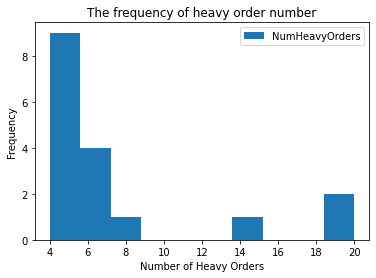

In [129]:
# Code to answer question 3.1.3 goes here. Call pd.read_sql(query, conn) using the query string from 3.2.1 and the conn object already defined for you in the "setup" cell for Question 3. 

df_heavy = pd.read_sql(query, conn)

#Add your code to generate the histogram from df_heavy here:
df_heavy.plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Number of Heavy Orders')
plt.title('The frequency of heavy order number')

In [130]:
# Code to answer question 3.2 goes here. You only need to provide the string containing your SQL query. Note that it may be helpful to use triple quotation marks """ for a multi-line string. 


query = """
select strftime('%m', OrderDate) as Month, count(1) as OrderNum from Orders
left join Employees
on Orders.EmployeeID = Employees.EmployeeID
where FirstName = 'Andrew'
group by strftime('%m', OrderDate)
order by OrderNum asc
"""

display_query(query)

,Month,OrderNum
0,08,3
1,10,3
2,02,4
3,06,4
4,07,4
5,05,5
6,11,7
7,12,9
8,01,11
9,09,12
